In [2]:
import numpy as np
import matplotlib.pyplot as plt

## Exercise 1:

Consider a linear inverse problem
$$
Ku = f^{\delta},
$$
with $f^{\delta} = K\overline u + \epsilon$, where $\epsilon$ is drawn from a normal distributed with zero mean and covariance $\Sigma_{\text{noise}}$ and $\overline u$ is drawn from a normal distributed with mean $\mu_{\text{prior}}$ and covariance $\Sigma_{\text{prior}}$.

Show that the posterior distribution is Gaussian with mean
$$
\mu_{\text{post}} = \mu_{\text{prior}} + \left(K^T\Sigma_{\text{noise}}^{-1}K + \Sigma_{\text{prior}}^{-1}\right)^{-1}K^T\Sigma_{\text{noise}}^{-1}(f - K\mu_{\text{prior}}),
$$
and covariance
$$
\Sigma_{\text{post}} = \Sigma_{\text{prior}} - \Sigma_{\text{prior}}K^T\left(K\Sigma_{\text{prior}}K^T + \Sigma_{\text{noise}}\right)^{-1}K\Sigma_{\text{prior}}.
$$
Hint: The [Binomial inverse theorem](https://en.wikipedia.org/wiki/Woodbury_matrix_identity#Binomial_inverse_theorem) may come in handy.


## answer

The likelihood is a Gaussian with mean $Ku$ and covariance $\Sigma_{\text{noise}}$:
$$\pi_{\text{likelihood}}(f^{\delta} | u) \propto \exp(-\textstyle{\frac{1}{2}}(Ku - f^{\delta})^T\Sigma_{\text{noise}}^{-1}(Ku - f^\delta)).$$
The prior is a Gaussian with mean $\mu_{\text{prior}}$ and covariance $\Sigma_{\text{prior}}$:
$$\pi_{\text{prior}}(u) \propto \exp(-\textstyle{\frac{1}{2}}(u - \mu_{\text{prior}})^T\Sigma_{\text{prior}}^{-1}(u - \mu_{\text{prior}})).$$
Forming the product gives 
$$\pi_{\text{post}}(u | f^{\delta}) \propto \exp(-\textstyle{\frac{1}{2}}(Ku - f^{\delta})^T\Sigma_{\text{noise}}^{-1}(Ku - f^\delta) -\textstyle{\frac{1}{2}}(u - \mu_{\text{prior}})^T\Sigma_{\text{prior}}^{-1}(u - \mu_{\text{prior}})).$$
The goal is to write this as
$$\pi_{\text{post}}(u | f^{\delta}) \propto \exp(-\textstyle{\frac{1}{2}}(u - \mu_{\text{post}})^T\Sigma_{\text{post}}^{-1}(u - \mu_{\text{post}})).$$


Expanding terms in the exponential we get
$$u^T(K^T\Sigma_{\text{noise}}^{-1}K + \Sigma_{\text{prior}}^{-1})u - 2u^T(K^T\Sigma_{\text{noise}}^{-1}f^\delta  + \Sigma_{\text{prior}}^{-1}\mu_{\text{prior}}) + \text{constants}.$$
The goal is to rewrite this as
$$u^T\Sigma_{\text{post}}^{-1}u - 2u^T\Sigma_{\text{post}}^{-1}\mu_{\text{post}} + \text{constants}.$$
Hence:
$$\Sigma_{\text{post}} = (K^T\Sigma_{\text{noise}}^{-1}K + \Sigma_{\text{prior}}^{-1})^{-1},$$
and
$$\mu_{\text{post}} = \Sigma_{\text{post}}(K^T\Sigma_{\text{noise}}^{-1}f^\delta  + \Sigma_{\text{prior}}^{-1}\mu_{\text{prior}}).$$
Using the Binomial inverse theorem we find the desired expression for $\Sigma_{\text{post}}$. More algebraic manipulations yield the desired expression for $\mu_{\text{post}}$

## Exercise 2:
Consider a linear inverse problem $Ku = f^{\delta}$, where we assume that $f^{\delta}$ follows a Poisson distribution with mean $\overline f = K\overline{u}$.

* Show that the MAP estimate may be obtained by solving the following minimization problem
$$
\min_u \sum_i \left(({K}u)_i - f_i^\delta\ln ({K}u)_i\right).
$$

* Assuming that both $\|Ku - f^{\delta}\|$ is small, show that the log-likelihood function may be approximated as
$$
\sum_i \left(({K}u)_i - f_i^\delta\ln ({K}u)_i\right) \approx \frac{1}{2}\|Ku - f^{\delta}\|_{\Sigma^{-1}}^2 + \text{constants},
$$
where $\Sigma$ is a diagonal matrix with elements $1/f_i^{\delta}$.

## answer

The likelihood is a Poisson distrubution with parameter $Ku$:
$$\pi_{\text{likelihood}}(f^{\delta} | u) \propto \prod_{i} \frac{(Ku)_i^{f^{\delta}_i} e^{-(Ku)_i}}{f^{\delta}_i!}.$$
Note that we have implicltly assumed some indepence so that we can simply multiple univariate distrubutions with parameter $(Ku)_i$ to get the multivariate distribution. Taking the negative $\log$ and ignoring the constant term (that do not depend on $u$) we get the desired expression.

The second and third questions are meant to show that in certain regimes, the Poisson distrubution is well-approximated by a Gaussian with mean and variance given by the Poisson parameter. Hence, for the purpose of MAP estimation we can replace the Poisson likelihood by a Gaussian, and hence minimization of a weighted least-squares problem. A derivation is given below

Assuming $u$ is close to the ground truth, we consider a Taylor expansion of the $\ln$ term around $f^{\delta}$:
$$\ln f_i \approx \ln f_i^\delta + \frac{(f_i - f^\delta)}{f^\delta} - \frac{(f_i - f_i^\delta)}{2(f_i^\delta)^2}.$$
Plugging this in in gives the desired expression.

## Exercise 3:
Consider the inverse problem
$$
Ku = f^{\delta},
$$
where
$$Ku(x) = \int_0^1 u(x')e^{-d(x-x')^2} \mathrm{d}x',$$
and
$$
f^{\delta} = K\overline{u} + \epsilon.
$$
Generate $\overline u \in \mathbb{R}^n$ as Gaussian random fields with mean zero and covariance
$$
\Sigma_{ij} = \exp\left(-\frac{|x_i-x_j|}{L}\right),
$$
and Gaussian noise, $\epsilon$, with zero mean and variance $\sigma$.


* For varying correlation length $L$ and noise level $\sigma$, reconstruct the images using the regularized pseudo inverse of $K$. How well can you reconstruct? You can draw samples from the multivariate normal distribution using `numpy.random.multivariate_normal`

* Compute the MAP estimate from
$$
\min_{u} \sigma^{-2}\|Ku - f^{\delta}\|_2^2 + \|u\|_{\Sigma^{-1}}^2.
$$
How well can you reconstruct now?

* What happens if you use two different covariance matrices for generating and reconstructing $u$?


In [17]:
def getK(n):
    h = 1/n;
    d = 1e3;
    x = np.linspace(h/2,1-h/2,n)
    xx,yy = np.meshgrid(x,x)
    K = np.exp(-d*(xx-yy)**2)
    
    return K,x

In [18]:
n = 100
sigma = 1e-1
L = 1

K,x = getK(n)

C = np.exp(-np.abs(np.outer(x,np.ones(n)) - np.outer(np.ones(n),x))/L)

u = np.random.multivariate_normal(np.zeros(n),C)
noise = sigma*np.random.randn(n)
f = K@u + noise

## answer

To study the difference, we'll consider solving the inverse problem using generalized Tikhonov
$$\min_u \|Ku - f\|^2 + \alpha \|R^{-1/2}u\|_2^2,$$
and compute the average (over random noise instances) error for various $\alpha$. The hypothesis is that using $R = C$ and $\alpha = \sigma^2$ gives the best results.

In [ ]:
# generate true image
n = 100
sigma = 1e-1
L = 1

K,x = getK(n)

C = np.exp(-np.abs(np.outer(x,np.ones(n)) - np.outer(np.ones(n),x))/L)

u = np.random.multivariate_normal(np.zeros(n),C)

In [97]:
def recon(u,sigma,alpha,R,m):
    """
    Draw random noise with variance sigma_true
    and reconstruct using generalized Tikhonov with regularization min_u \|Ku - f\|^2 + alpha \|R^{-1/2}u\|_2^2
    """
    n = len(u_true)
    K,x = getK(n)
    
    urec = np.zeros((m,n))
    for k in range(m):
        noise = sigma*np.random.randn(n)
        f = K@u + noise
        urec[k] = np.linalg.solve(K.T@K + alpha*np.linalg.inv(R), K.T@f)
    
    error = np.mean(np.sum((urec - u)**2,axis=1))    
    return error,urec

In [ ]:
# sampling settings
m = 100
alpha = np.linspace(0.1,10,50)

First, let's consider standard Tikhonov regularization $R = I$:

In [104]:
R = np.eye(n)
error1 = np.zeros(len(alpha))
for k in range(len(alpha)):
    error1[k],urec = recon(u,sigma,alpha[k],R,m)

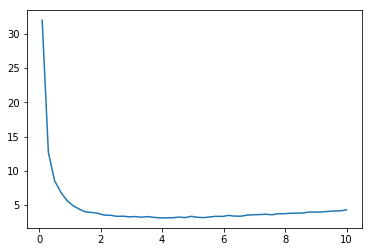

In [105]:
plt.plot(alpha,error1,label='R = I')

Next, let's use the actual noise and prior covariance:

In [106]:
R = C
error2 = np.zeros(len(alpha))
for k in range(len(alpha)):
    error2[k],urec = recon(u,sigma,alpha[k],R,m)

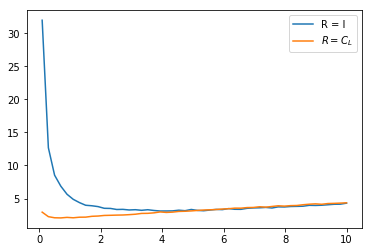

In [111]:
plt.plot(alpha,error1,label='$R = I$')
plt.plot(alpha,error2,label='$R = C_L$')
plt.legend()

We can conclude that

* Using the actual underlying covariance does indeed lead to better results.
* The optimal $\alpha$ when using the true covariance matrix is indeed given by $\sigma^2$
* For large $\alpha$ it does not really matter which covariance matrix is used to reglarize the problem

Finally, we can consider using a regularization with a large correlation length:

In [109]:
R = np.exp(-np.abs(np.outer(x,np.ones(n)) - np.outer(np.ones(n),x))/(2*L))
error3 = np.zeros(len(alpha))
for k in range(len(alpha)):
    error3[k],urec = recon(u,sigma,alpha[k],R,m)

(0, 2)

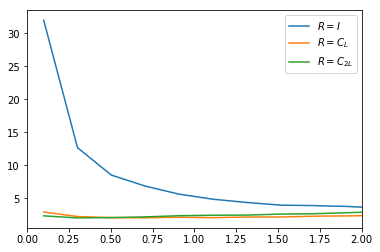

In [113]:
plt.plot(alpha,error1,label='$R = I$')
plt.plot(alpha,error2,label='$R = C_{L}$')
plt.plot(alpha,error3,label='$R = C_{2L}$')
plt.legend()
plt.xlim([0,2])

We note that is does do a little better when we underestimate $\alpha$ and worse if we overestimate it.